# Poiseuille flow in VEF 3D Channel - Re=1000 

In [1]:
from trustutils import run

run.introduction("V. Barthel")

## Introduction 
 Validation made by : V. Barthel



 Report generated 25/01/2022

### Description
Basical laminar flow against several meshes. \
Influence of the effect of alpha factor in the EF_stab scheme \
Validated with analytic profile $U(y) = \frac{0.3}{2} y(2-y)$ , theorical pressure loss and friction velocity.

### Parameters TRUST

* Version TRUST : 1.5.7
* Binary:  (a faire)
* Type of problem :  Hydraulique 3D
* Discretization :  VEFPre1B
* Time scheme :  EulerImplicite
* Solving of equations :  Navier Stokesstandard
* Convection scheme :  EFstab, alpha=1 and alpha=0.2
* Time scheme :  Euler implicite
* Type of boundary conditions :  Periodicity in x and z directions, wall for y boundaries
* Type of fluid :  ’virtual’

In [2]:
from trustutils import run
c1 = run.addCase("Ny9"    ,"canalVEF.data")   
c2 = run.addCase("Ny17"   ,"canalVEF.data")   
c3 = run.addCase("Ny25"   ,"canalVEF.data")   
c4 = run.addCase("Ny25_02","canalVEF.data")
run.printCases()
run.runCases() 

### Test cases 
* Ny9/canalVEF.data : 
* Ny17/canalVEF.data : 
* Ny25/canalVEF.data : 
* Ny25_02/canalVEF.data : 


Running **with Sserver**...
  => A total of 4 cases were (successfully) run in 72.8s.


## Test Description

Geometry :  plane channel \
Dimensions :  Ly=2 (=h), Lx = Lz are depending on Ny to get isotropic cells \
Initial conditions :  vitesse Champ_Uniforme 3 0.1 0.  0. \
Boundary conditions :  The periodicity conditions need a source term to maintain the flow constant \
Canalperio { bord periox } \
Mesh :  3x9x3 3x17x3 and 3x25x3 with Tetraedriser \
Ny=9 , Ny=17 and Ny=25

### Mesh with Ny=9

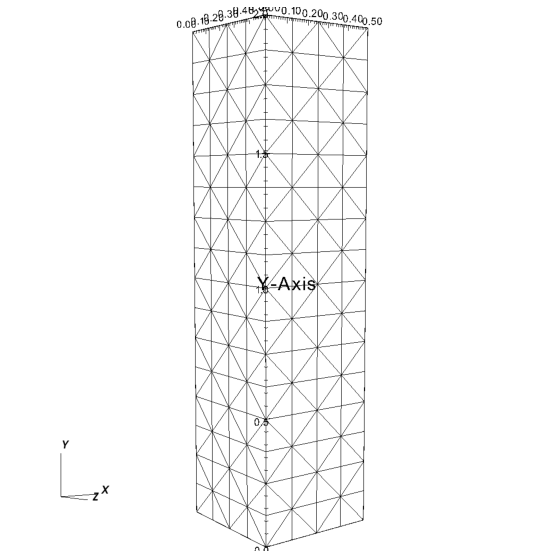

In [3]:
from trustutils import visit 

a = visit.Show('./Ny9/canalVEF.lata', 'Mesh','dom')
a.normal3D([-0.6,0.1,0.8])
a.zoom3D([0,0,0.95])
a.visuOptions(["no_databaseinfo","no_legend"])
a.plot()

### Mesh with Ny=17

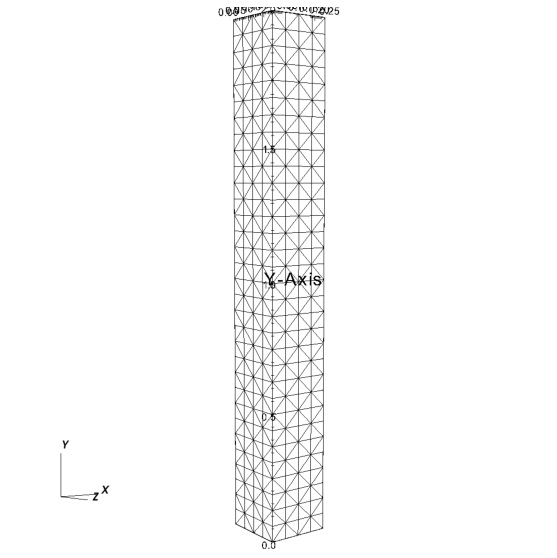

In [4]:
a = visit.Show('./Ny17/canalVEF.lata', 'Mesh','dom')
a.normal3D([-0.6,0.1,0.8])
a.zoom3D([0,0,0.95])
a.visuOptions(["no_databaseinfo","no_legend"])
a.plot()

### Mesh with Ny=25


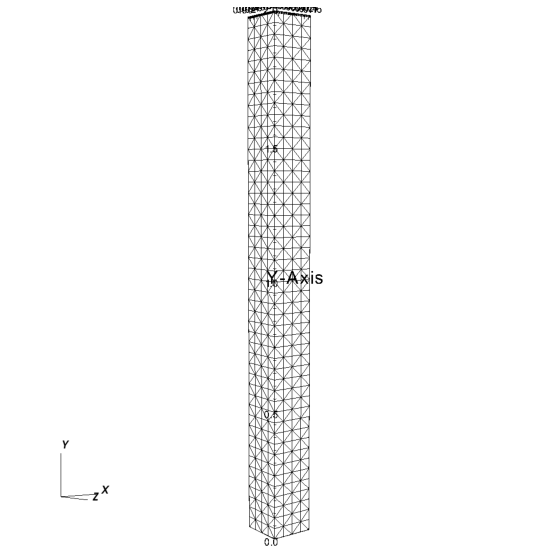

In [5]:
a = visit.Show('./Ny25/canalVEF.lata', 'Mesh','dom')
a.normal3D([-0.6,0.1,0.8])
a.zoom3D([0,0,0.95])
a.visuOptions(["no_databaseinfo","no_legend"])
a.plot()

## Physical properties

Fluid domain:  Helium \
No Gravity effect 

In [6]:
from trustutils.jupyter import plot 
import numpy as np

columns=["Valeur"]
Table=plot.Table(columns)  
rho=plot.loadText("rho.dat") 
mu =plot.loadText("mu.dat") 
Table.addLigne([[rho]],"$\rho$ en kg/m")   
Table.addLigne([[mu ]],"$\mu$ en N/m/s")   
Table.df

,Valeur
$\rho$ en kg/m,2.0
$\mu$ en N/m/s,0.0008


## Mean Vx velocity profile

### Velocity profile Vx
The profiles given for each mesh is compared with the analytical one.

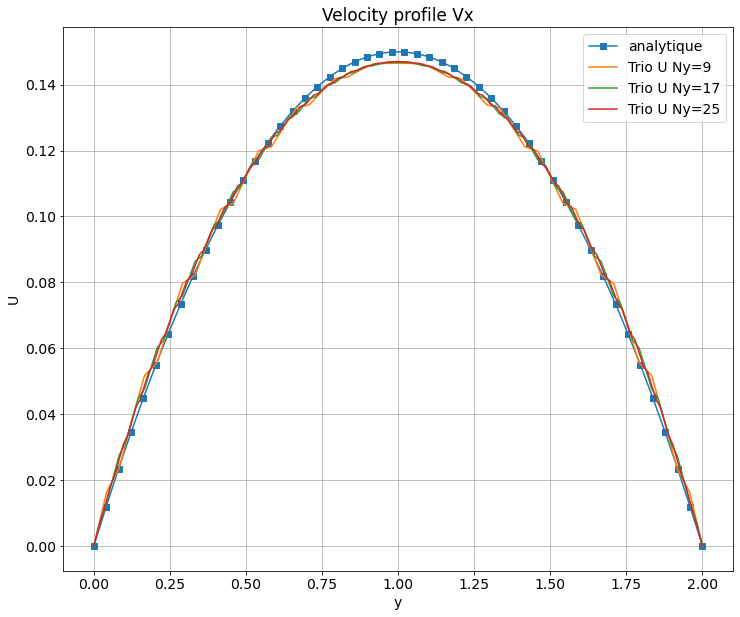

In [7]:
from trustutils import plot
import numpy as np

a = plot.Graph('Velocity profile Vx')

#Fonction analytique*
x=np.linspace(0,2,50)
y=(-0.3/2.)*x*(x-2)
a.add(x,y,"-s",label="analytique")  

x=plot.loadText("./Ny9/Moyennes_spatiales_vitesse_rho_mu")
a.add(x[0],x[1],"-",label="Trio U Ny=9")  

x=plot.loadText("./Ny17/Moyennes_spatiales_vitesse_rho_mu")
a.add(x[0],x[1],"-",label="Trio U Ny=17")  

x=plot.loadText("./Ny25/Moyennes_spatiales_vitesse_rho_mu")
a.add(x[0],x[1],"-",label="Trio U Ny=25")  

a.label("y","U")
a.visu()

### Relative error on Vx maximal value

The maximal value of x velocity is not totally reached because of the numericial schemes precision.But it is clear that the difference against the theorical value is very low for all the three meshes.

In [8]:
from trustutils.jupyter import plot
from trustutils import files as tf
from trustutils import visit
import numpy as np

tmp=visit.export_lata_base("./Ny9/canalVEF.lata","Pseudocolor","VITESSE_X_FACES_dom_dual","N9")
tmp.maximun()  
tmp=visit.export_lata_base("./Ny17/canalVEF.lata","Pseudocolor","VITESSE_X_FACES_dom_dual","N17")
tmp.maximun()  
tmp=visit.export_lata_base("./Ny25/canalVEF.lata","Pseudocolor","VITESSE_X_FACES_dom_dual","N25")
tmp.maximun()  

MaxN9 =plot.loadText("MaxN9" )
MaxN17=plot.loadText("MaxN17")
MaxN25=plot.loadText("MaxN25")

columns=["Max analytic "," Max Trio_U "," Error(%)"]
Table=plot.Table(columns)  
Table.addLigne([[0.15,MaxN9 ,100*(0.15-MaxN9 )/0.15]],"Ny9 ")  
Table.addLigne([[0.15,MaxN17,100*(0.15-MaxN17)/0.15]],"Ny17")  
Table.addLigne([[0.15,MaxN25,100*(0.15-MaxN25)/0.15]],"Ny25")  
Table.df

,Max analytic,Max Trio_U,Error(%)
Ny9,0.15,0.146518945694,2.320703
Ny17,0.15,0.146785125136,2.143250
Ny25,0.15,0.146995574236,2.002951


## Convergency

### Velocity at central point

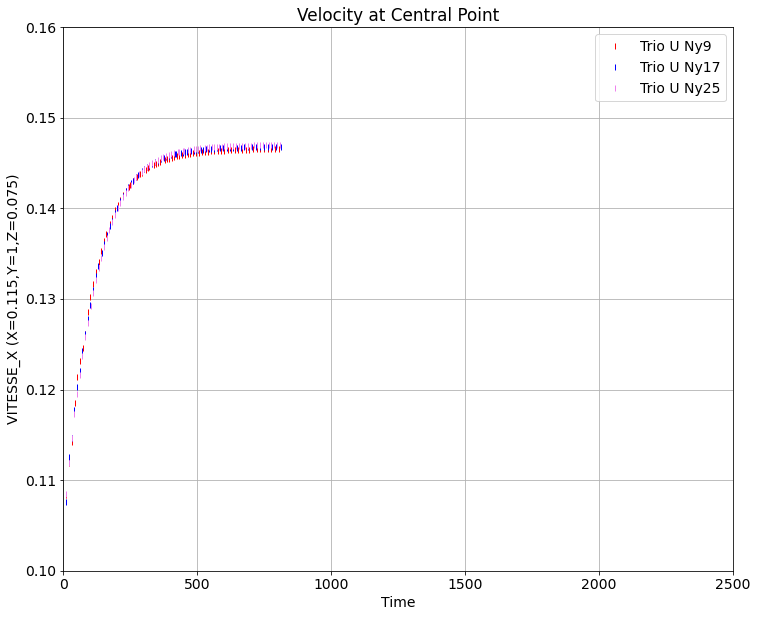

In [9]:
from trustutils.jupyter import plot 
import numpy as np

graphique=plot.Graph("Velocity at Central Point") 
graphique.addPoint('./Ny9/canalVEF_SONDE_POINT.son' ,marker="|",color='r'     ,var="x" ,label="Trio U Ny9") 
graphique.addPoint('./Ny17/canalVEF_SONDE_POINT.son',marker="|",color='b'     ,var="x" ,label="Trio U Ny17") 
graphique.addPoint('./Ny25/canalVEF_SONDE_POINT.son',marker="|",color='violet',var="x" ,label="Trio U Ny25")   
graphique.visu(0,2500,0.10,0.16) 

## Pressure loss

The next table shows the friction velocity u* and the pressure loss ∆P/ρ/∆x for each mesh against thetheorical values.

For theorical values

- u* is given by laminar formula for a channel :  Cf=$\frac{\lambda}{4}$ and $\lambda=\frac{96}{Rehyd}$. \
As $u^*=\sqrt{0.5 \cdot Cf \cdot Um^2}$, it comes $u^*=Um \cdot \sqrt{\frac{12}{Rehyd}}$
- $\Delta P/\rho/\Delta x$ is deduced by the theorical formula $u^*=\sqrt{\Delta P/\rho/\Delta x V/S}$

where V and S are respectively the volume and the wall area of the geometry.  For this bi-periodic channelgeometry, $\frac{V}{S}=\frac{h}{2}$.

For TrioU calculations :

- u* is taken as the established value given in the file u_tau.dat (in fact the last value), issued from the data command 'traitement_particulier_canal'

- ∆P/ρ/∆x is taken as the established value given in the file \*Pressure_Gradient_pb_periox

The table below shows that even if the differences between the velocity profiles and maximum Ux value against the analytical ones are low,  they have a important effect on the pressure loss and the friction velocity distortion.

### Friction velocity and pressure loss for each calculation

In [10]:
from trustutils.jupyter import plot
from trustutils import files as tf
from trustutils import visit
import numpy as np 

pressN9 =plot.loadText("./Ny9/press.dat" )
pressN17=plot.loadText("./Ny17/press.dat")
pressN25=plot.loadText("./Ny25/press.dat")

columns=["U* Trio_U "," U* theo "," Error on U* in $%$ "," $\Delta$P Trio_U "," $\Delta$P theo "," Error on $\Delta$P in $%$"]
Table=plot.Table(columns)  
Table.addLigne([pressN9 ],"Ny9 ")      
Table.addLigne([pressN17],"Ny17")      
Table.addLigne([pressN25],"Ny25")    
Table.df

,U* Trio_U,U* theo,Error on U* in $%$,$\Delta$P Trio_U,$\Delta$P theo,Error on $\Delta$P in $%$
Ny9,0.01249,0.01095,14.0,0.00015,0.00012,27.4
Ny17,0.01210,0.01095,10.4,0.00014,0.00012,20.3
Ny25,0.01186,0.01095,8.2,0.00014,0.00012,16.3


## Effect of the alpha coefficient for EFstab scheme

For the thinest mesh we make a calculation including an alpha coefficient equal to 0.2 (default 1.)

The Efstab scheme is a centered scheme stabilised with an upwind scheme according to this coefficient.The more alpha is low, the more the scheme is centered.

### Velocity profile Vx

The profiles with alpha=1. and alpha=0.2 are compared with the analytical one.

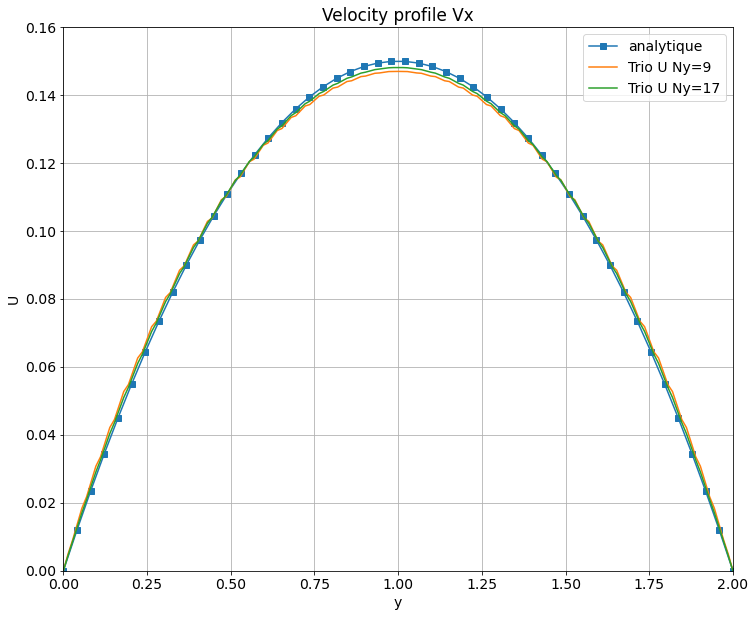

In [11]:
import numpy as np

from trustutils import plot
import numpy as np

a = plot.Graph('Velocity profile Vx')

#Fonction analytique*
x=np.linspace(0,2,50)
y=(-0.3/2.)*x*(x-2)
a.add(x,y,"-s",label="analytique")  

x=plot.loadText("./Ny25/Moyennes_spatiales_vitesse_rho_mu")
a.add(x[0],x[1],"-",label="Trio U Ny=9")  

x=plot.loadText("./Ny25_02/Moyennes_spatiales_vitesse_rho_mu")
a.add(x[0],x[1],"-",label="Trio U Ny=17")  

a.label("y","U")
a.visu(0,2,0,0.16)


### Relative error on Vx maximal value

In [12]:
from trustutils.jupyter import plot
from trustutils import files as tf
from trustutils import visit
import numpy as np 
  
tmp=visit.export_lata_base("./Ny25/canalVEF.lata","Pseudocolor","VITESSE_X_FACES_dom_dual","N25")
tmp.maximun()    
tmp=visit.export_lata_base("./Ny25_02/canalVEF.lata","Pseudocolor","VITESSE_X_FACES_dom_dual","N25_02")
tmp.maximun()  

MaxN25   =plot.loadText("MaxN25"   )
MaxN25_02=plot.loadText("MaxN25_02")

columns=["Max analytic","Max Trio_U","Error(%)"]
Table=plot.Table(columns)      
Table.addLigne([[0.15,MaxN25   ,(0.15-MaxN25   )/0.15*100]],"Ny25")    
Table.addLigne([[0.15,MaxN25_02,(0.15-MaxN25_02)/0.15*100]],"Ny25")    
Table.df

,Max analytic,Max Trio_U,Error(%)
Ny25,0.15,0.146995574236,2.002951
Ny25,0.15,0.148137360811,1.241759


### Friction velocity and pressure loss for each calculation

In [13]:
from trustutils.jupyter import plot
from trustutils import files as tf
from trustutils import visit
import numpy as np  

pressN25   =plot.loadText("./Ny25/press.dat")
pressN25_02=plot.loadText("./Ny25_02/press.dat")

columns=["U* Trio_U "," U* theo "," Error on U* in $%$ "," $\Delta$P Trio_U "," $\Delta$P theo "," Error on $\Delta$P in $%$"]
Table=plot.Table(columns)        
Table.addLigne([pressN25   ],"Ny25")   
Table.addLigne([pressN25_02],"Ny25_02")    
Table.df

,U* Trio_U,U* theo,Error on U* in $%$,$\Delta$P Trio_U,$\Delta$P theo,Error on $\Delta$P in $%$
Ny25,0.01186,0.01095,8.2,0.00014,0.00012,16.3
Ny25_02,0.01128,0.01095,3.0,0.00013,0.00012,6.0


## Conclusions

In this laminar case, the use of a reduced value for alpha coefficient has an important positive effect on the calculated pressure loss.  But using a weak alpha value can make the calculation unstable.  So pay some attention for the time step not to be too high, especially using implicite scheme.

The friction velocity is not so good despite the mesh refinement.  Some work has to be done to make it better.

### Computer performance

In [14]:
from trustutils import run
run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cells
Ny9/canalVEF,is244522,Linux,9.06653,0.0636769,1536
Ny17/canalVEF,is244522,Linux,35.89010,0.172388,3072
Ny25/canalVEF,is244522,Linux,72.52150,0.26354,4608
Ny25_02/canalVEF,is244522,Linux,71.65240,0.248616,4608
Total,,,189.13053,,


## Data Files

### canalVEF

In [15]:
from trustutils import run 
run.dumpDataset("./canalVEF.data")  

 # Thermohydraulique 3D avec modele K-Epsilon V2 #
 # PARALLEL NOT #
 dimension 3
 Pb_hydraulique pb
 Domaine dom
 # BEGIN MESH #
 
 Mailler dom
 {
 	 Pave canal
 	 	 {
 	 	 Origine 0. 0. 0.
 	 	 Longueurs 0.5 2 0.5
 	 	 Nombre_de_Noeuds 3 9 3
 	 	 }
 	 	 {
 	 	 Bord fond      Y = 2.       0. <= X <= 0.5    0. <= Z <= 0.5
 	 	 Bord periox    X = 0.       0. <= Y <= 2.     0. <= Z <= 0.5
 	 	 Bord periox    X = 0.5      0. <= Y <= 2.     0. <= Z <= 0.5
 	 	 Bord devant    Y = 0.       0. <= X <= 0.5    0. <= Z <= 0.5
 	 	 Bord perioz    Z = 0.       0. <= X <= 0.5    0 <= Y <= 2.
 	 	 Bord perioz    Z = 0.5      0. <= X <= 0.5    0 <= Y <= 2.
 	 	 } 
 
 }
 
 Tetraedriser_homogene_fin dom
 
 Corriger_frontiere_periodique { Domaine dom Bord periox }
 Corriger_frontiere_periodique { Domaine dom Bord perioz }
 
 
 # END MESH #
 
 # BEGIN SCATTER
 Scatter DOM.Zones dom
 END SCATTER #
 
 VEFPreP1B dis
 
 Scheme_euler_implicit sch
 Read sch
 {
 	 tinit 0
 	 tmax  800.
 	 dt_min 1.e-5
 	 dt_max